## Import Libraries

In [13]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import Imputer

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

## Load the Dataset

In [14]:
WiDS = pd.read_csv("H:\WiDS Datathon 2021\TrainingWiDS2021.csv")

In [15]:
WiDS.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,...,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


## Exploratory Data Analysis

In [16]:
# Inspect the Number of Rows and Columns
WiDS.shape

(130157, 181)

In [17]:
#Identifier column do not have any sif=gnificance in Model Building so we caan drop those
WiDS.filter(regex='_id').columns

Index(['encounter_id', 'hospital_id', 'icu_id'], dtype='object')

In [18]:
WiDS.drop(list(WiDS.filter(regex = '_id')), axis = 1, inplace = True)

In [19]:
WiDS = WiDS.drop([WiDS.columns[0]] ,  axis='columns')

In [20]:
# Check for the columns in the Dataset which has 80% or more NA values
WiDS.columns[WiDS.apply(lambda col: col.isnull().sum()/len(WiDS) > 0.70)]

Index(['fio2_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache',
       'ph_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
       'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_sysbp_invasive_max',
       'd1_sysbp_invasive_min', 'h1_diasbp_invasive_max',
       'h1_diasbp_invasive_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min',
       'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'd1_lactate_max',
       'd1_lactate_min', 'h1_albumin_max', 'h1_albumin_min',
       'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min',
       'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max',
       'h1_creatinine_min', 'h1_hco3_max', 'h1_hco3_min', 'h1_hemaglobin_max',
       'h1_hemaglobin_min', 'h1_hematocrit_max', 'h1_hematocrit_min',
       'h1_lactate_max', 'h1_lactate_min', 'h1_platelets_max',
       'h1_platelets_min', 'h1_potassium_max', 'h1_potassium_min',
       'h1_sodium_max', 'h1_sodium_min', 'h1_wbc_max', 'h1_wbc_min',
       'd1_pao

In [21]:
# Drop all the Columns which has 79% and more NA values which we identified in above ste
WiDS = WiDS.drop(WiDS.columns[WiDS.apply(lambda col: col.isnull().sum()/len(WiDS) > 0.70)], axis=1)

In [22]:
# column readmission_status has only one unique value so column can be dropped from Dataframe
WiDS['readmission_status'].unique()
WiDS.drop("readmission_status", axis=1, inplace=True)

In [23]:
# Impute the Missing values for Categorical Variables based on Mode
WiDS['ethnicity'].fillna('Unknown', inplace=True)
WiDS['gender'].fillna('Unknown', inplace=True)
WiDS['hospital_admit_source'].fillna('Emergency Department', inplace=True)
WiDS['icu_admit_source'].fillna('Emergency Department', inplace=True)
WiDS['icu_stay_type'].fillna('admit', inplace=True)
WiDS['icu_type'].fillna('Med-Surg ICU', inplace=True)

In [24]:
# Convert column to categorical in pandas python using categorical() function
WiDS['ethnicity'] = pd.Categorical(WiDS.ethnicity)
WiDS['gender'] = pd.Categorical(WiDS.gender)
WiDS['hospital_admit_source'] = pd.Categorical(WiDS.hospital_admit_source)
WiDS['icu_admit_source'] = pd.Categorical(WiDS.hospital_admit_source)
WiDS['icu_stay_type'] = pd.Categorical(WiDS.icu_stay_type)
WiDS['icu_type'] = pd.Categorical(WiDS.icu_type)

### Impute Missing value for the Numeric Values

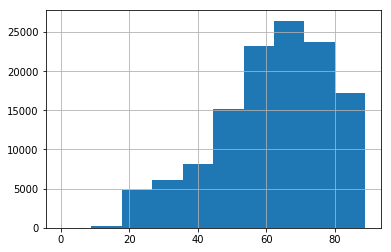

In [104]:
WiDS['age'].hist()
WiDS['age'] = WiDS['age'].groupby([WiDS['gender']]).apply(lambda x: x.fillna(x.median()))

In [27]:
WiDS['bmi'] = WiDS['bmi'].fillna(WiDS.weight / (WiDS.height*WiDS.height))

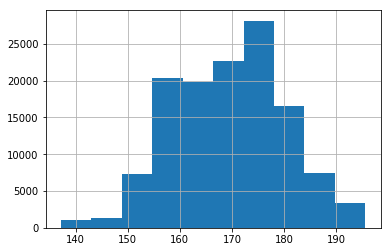

In [25]:
WiDS['height'].hist()
WiDS['height'] = WiDS['height'].groupby([WiDS['gender']]).apply(lambda x: x.fillna(x.mean()))

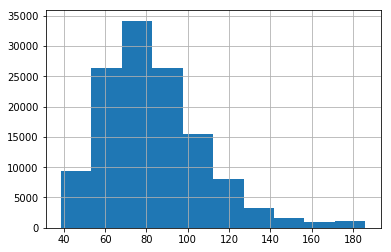

In [26]:
WiDS['weight'].hist()
WiDS['weight'] = WiDS['weight'].groupby([WiDS['gender']]).apply(lambda x: x.fillna(x.median()))

In [114]:
# Impute Missing Value Based on Median
WiDS['d1_glucose_min'] = WiDS['d1_glucose_min'].groupby([WiDS['gender']]).apply(lambda x: x.fillna(x.median()))
WiDS['d1_glucose_max'] = WiDS['d1_glucose_max'].groupby([WiDS['gender']]).apply(lambda x: x.fillna(x.median()))
WiDS['h1_glucose_min'] = WiDS['h1_glucose_min'].groupby([WiDS['gender']]).apply(lambda x: x.fillna(x.median()))
WiDS['h1_glucose_max'] = WiDS['h1_glucose_max'].groupby([WiDS['gender']]).apply(lambda x: x.fillna(x.median()))
WiDS['d1_bun_min'] = WiDS['d1_bun_min'].groupby([WiDS['gender']]).apply(lambda x: x.fillna(x.median()))
WiDS['d1_bun_max'] = WiDS['d1_bun_max'].groupby([WiDS['gender']]).apply(lambda x: x.fillna(x.median()))
WiDS['d1_creatinine_min'] = WiDS['d1_creatinine_min'].groupby([WiDS['gender']]).apply(lambda x: x.fillna(x.median()))
WiDS['d1_creatinine_max'] = WiDS['d1_creatinine_max'].groupby([WiDS['gender']]).apply(lambda x: x.fillna(x.median()))

WiDS['gcs_eyes_apache'] = WiDS['gcs_eyes_apache'].groupby([WiDS['gender']]).apply(lambda x: x.fillna(x.mode()))
WiDS['gcs_motor_apache'] = WiDS['gcs_motor_apache'].groupby([WiDS['gender']]).apply(lambda x: x.fillna(x.mode()))
WiDS['gcs_verbal_apache'] = WiDS['gcs_verbal_apache'].groupby([WiDS['gender']]).apply(lambda x: x.fillna(x.mode()))

In [108]:
# According to the data dictionary, the _apache variables are  measured during the first 24 hours which results in the highest
# APACHE III score and  d1_..._max is the highest concentration of the patient during the first 24 hours of their unit stay
# Therefore, we could assume that the _apache and the d1_..._max values should be similar to each other
WiDS.d1_albumin_max.fillna(WiDS.albumin_apache, inplace=True)
WiDS.d1_bilirubin_max.fillna(WiDS.bilirubin_apache, inplace=True)
WiDS.d1_bun_max.fillna(WiDS.bun_apache, inplace=True)
WiDS.d1_creatinine_max.fillna(WiDS.creatinine_apache, inplace=True)
WiDS.d1_glucose_max.fillna(WiDS.glucose_apache, inplace=True)
WiDS.d1_hematocrit_max.fillna(WiDS.hematocrit_apache, inplace=True)
WiDS.d1_heartrate_max.fillna(WiDS.heart_rate_apache, inplace=True)
WiDS.d1_resprate_max.fillna(WiDS.resprate_apache, inplace=True)
WiDS.d1_wbc_max.fillna(WiDS.wbc_apache, inplace=True)
WiDS.d1_sodium_max.fillna(WiDS.sodium_apache, inplace=True)

# Drop ..._apache column
WiDS.drop('albumin_apache', axis=1, inplace=True)
WiDS.drop('bilirubin_apache', axis=1, inplace=True)
WiDS.drop('bun_apache', axis=1, inplace=True)
WiDS.drop('creatinine_apache', axis=1, inplace=True)
WiDS.drop('glucose_apache', axis=1, inplace=True)
WiDS.drop('hematocrit_apache', axis=1, inplace=True)
WiDS.drop('heart_rate_apache', axis=1, inplace=True)
WiDS.drop('resprate_apache', axis=1, inplace=True)
WiDS.drop('wbc_apache', axis=1, inplace=True)
WiDS.drop('sodium_apache', axis=1, inplace=True)

In [122]:
# The Glasgow Coma Scale (GCS) is a metric to measure a person's level of consciousness. It is based on the person's eye 
# response, verbal response and motor response and ranges from 0 (unconscious) to 15 (fully conscious).
WiDS["gcs_sum_apache"] = WiDS[['gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache']].sum(axis=1)

WiDS.drop('gcs_eyes_apache', axis=1, inplace=True)
WiDS.drop('gcs_motor_apache', axis=1, inplace=True)
WiDS.drop('gcs_verbal_apache', axis=1, inplace=True)

In [123]:
#WiDS.hist(column="gcs_motor_apache",by="gender",bins=30)

In [129]:
WiDS.shape

(130157, 132)

In [28]:
#Correlation with output variable
cor = WiDS.corr()
cor_target = abs(cor["diabetes_mellitus"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

bmi                  0.142240
weight               0.153468
arf_apache           0.108469
bun_apache           0.145241
creatinine_apache    0.124891
glucose_apache       0.354359
d1_bun_max           0.146990
d1_bun_min           0.137304
d1_creatinine_max    0.127929
d1_creatinine_min    0.125828
d1_glucose_max       0.400742
d1_glucose_min       0.135848
h1_glucose_max       0.316847
h1_glucose_min       0.304520
diabetes_mellitus    1.000000
Name: diabetes_mellitus, dtype: float64

In [29]:
cor_target

age                            0.081019
bmi                            0.142240
elective_surgery               0.004910
height                         0.004075
pre_icu_los_days               0.022141
                                 ...   
immunosuppression              0.003022
leukemia                       0.003574
lymphoma                       0.000253
solid_tumor_with_metastasis    0.013190
diabetes_mellitus              1.000000
Name: diabetes_mellitus, Length: 115, dtype: float64

In [156]:
WiDS_null = WiDS.isnull().sum().sort_values(ascending=False)

In [162]:
category_variables = ['gender', 'ethnicity', 'hospital_admit_source','icu_admit_source',
       'icu_stay_type', 'icu_type']
for category in category_variables:
    WiDS[category] = pd.get_dummies(WiDS[category])

In [163]:
target = WiDS['diabetes_mellitus']
WiDS_Train = WiDS.drop(['diabetes_mellitus'],axis=1)

In [170]:
imp = Imputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(WiDS_Train)

In [171]:
# Impute our data, then train
X_train_imp = imp.transform(WiDS_Train)

In [173]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100, max_features = 20) # sampling with rows and with columns
classifier.fit(X_train_imp,target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

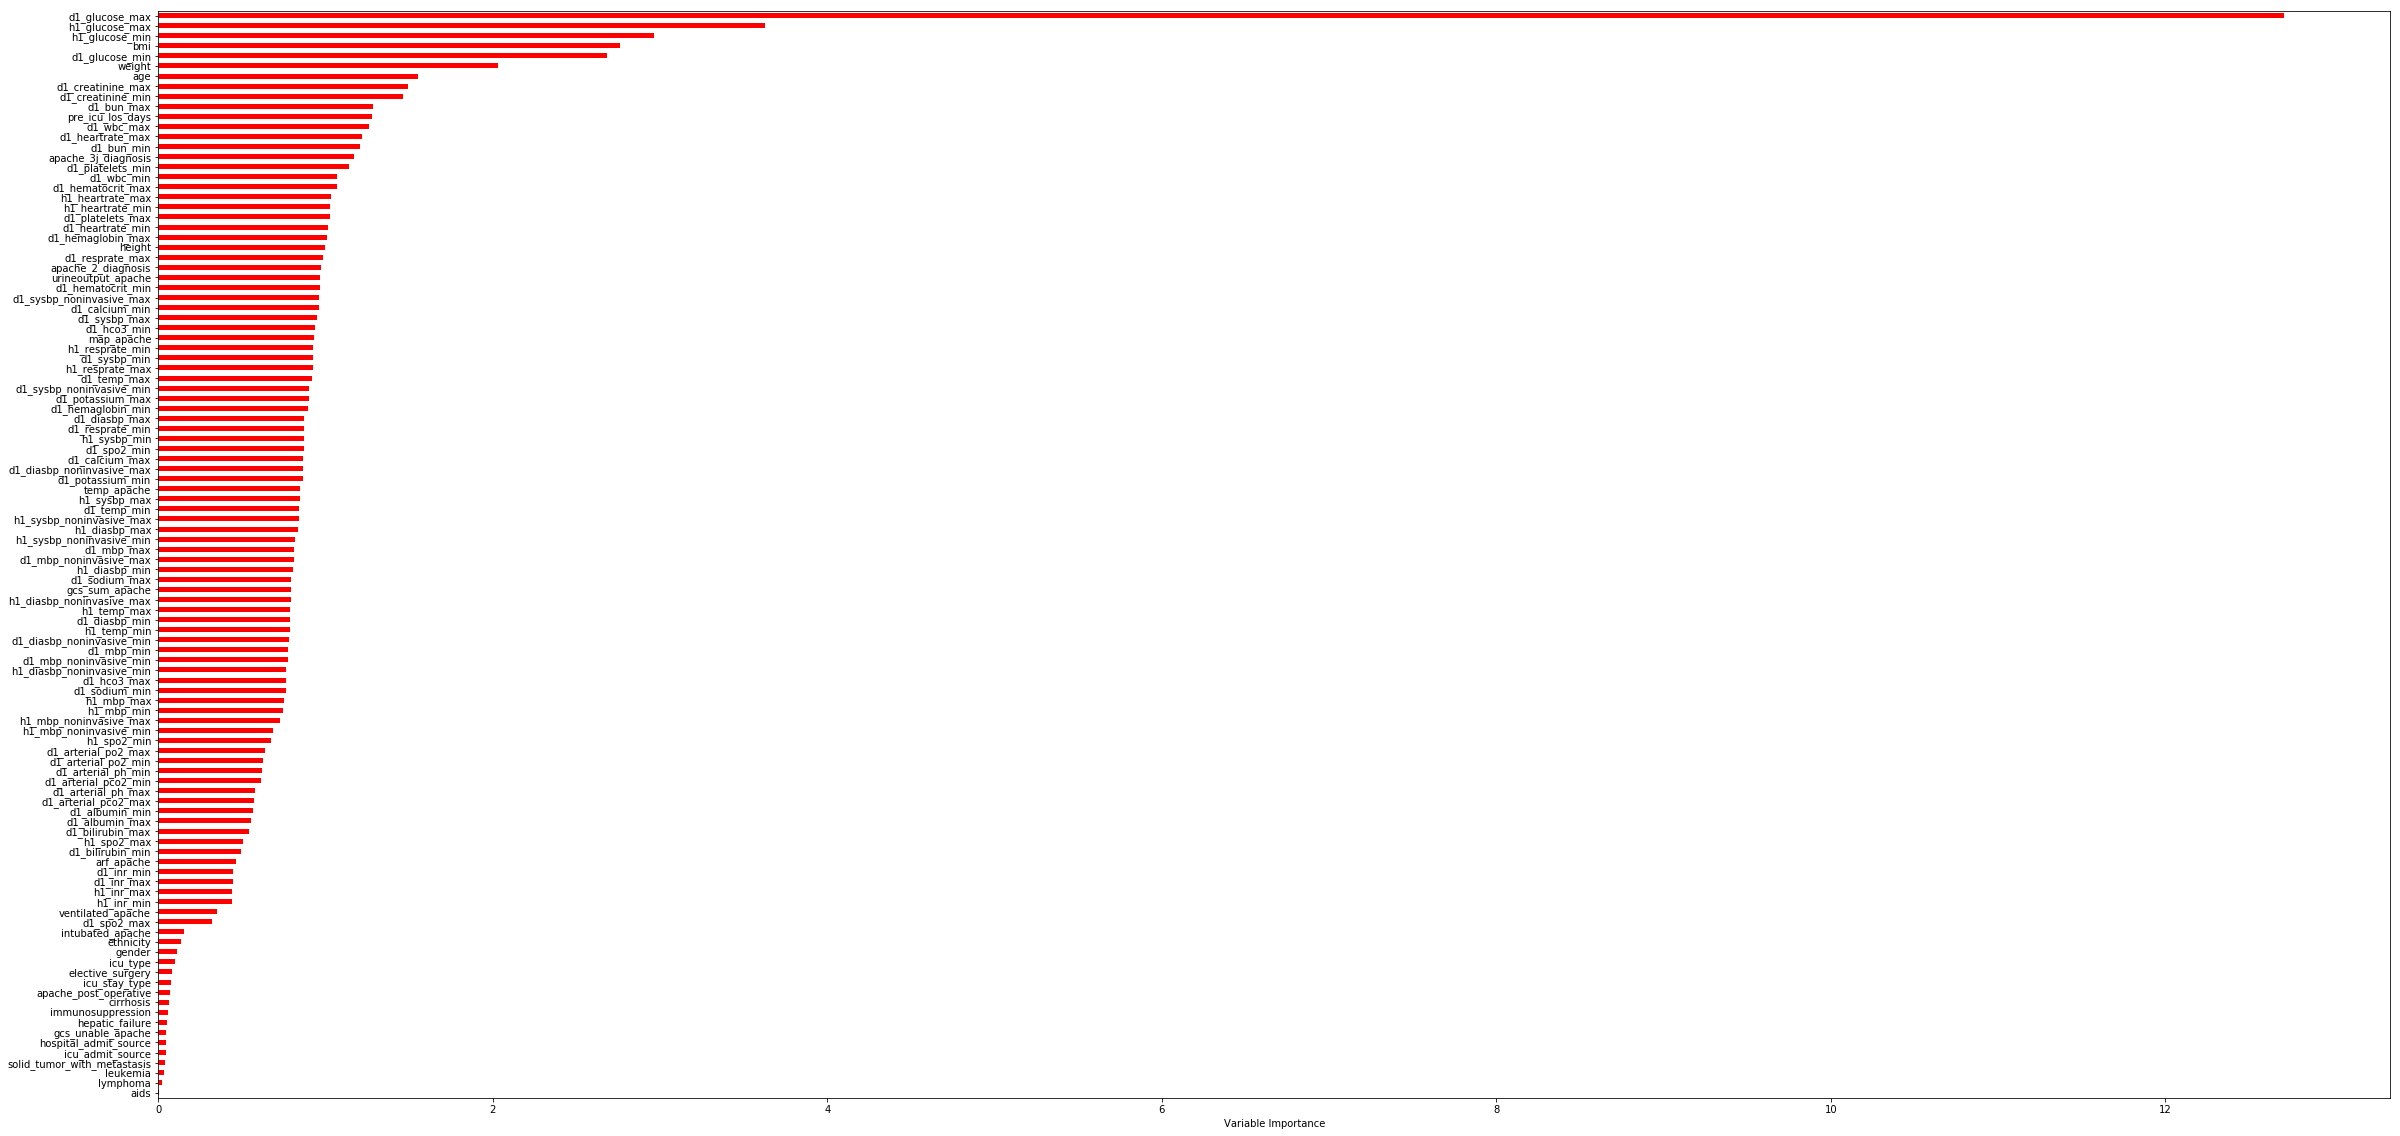

In [181]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,20)
Importance = pd.DataFrame({'Importance':classifier.feature_importances_*100}, index=WiDS_Train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [37]:
WiDS['d1_glucose_max'].min()


73.0